**Question 2**

Does day of the week and time of posting affect engagement rates?

**1. Import the data set**

In [ ]:
import pandas as pd

# Read the data from the Google Sheet
df = pd.read_excel("/content/social_data.xlsx")

df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


**2. Calculate the required values**

In [ ]:
# Create the `Published Date` column
df["Published Date"] = pd.to_datetime(df["Published Date"])

# Extract the day of the week from the `Published Date` column
df["Day of Week"] = df["Published Date"].dt.day_name()

# Order the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=days, ordered=True)

# Now, calculate the average engagement rate by day of the week
avg_engagement_rate_by_day_of_week = df.groupby("Day of Week").mean()["Total Engagements"] / (df.groupby("Day of Week").mean()["Total Engagements"].sum()) *100

# Convert series to dataframe for a neater display
engagement_df = avg_engagement_rate_by_day_of_week.reset_index()
engagement_df.columns = ['Day of Week', 'Average Engagement Rate (%)']

# Display the dataframe
print(engagement_df)

  Day of Week  Average Engagement Rate (%)
0      Monday                    11.284174
1     Tuesday                    20.705798
2   Wednesday                    12.386777
3    Thursday                    17.205193
4      Friday                    14.412954
5    Saturday                     7.302472
6      Sunday                    16.702632


<ipython-input-44-2bd9fc2e20e3>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_day_of_week = df.groupby("Day of Week").mean()["Total Engagements"] / (df.groupby("Day of Week").mean()["Total Engagements"].sum()) *100
<ipython-input-44-2bd9fc2e20e3>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_rate_by_day_of_week = df.groupby("Day of Week").mean()["Total Engagements"] / (df.groupby("Day of Week").mean()["Total Engagements"].sum()) *100


**3. Plot the values for better understanding**

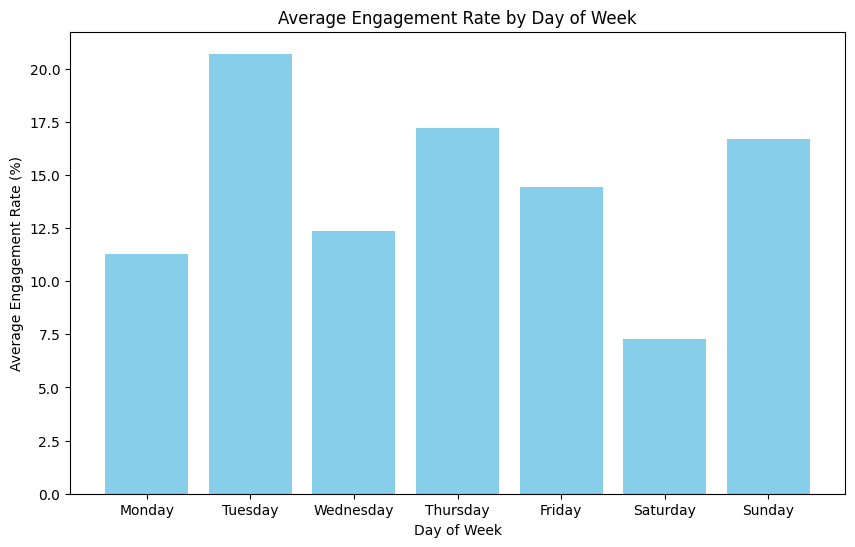

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(engagement_df['Day of Week'], engagement_df['Average Engagement Rate (%)'], color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate (%)')
plt.title('Average Engagement Rate by Day of Week')
plt.show()


As we can see, the average engagement rate changes by weekday. According to the statistics, the highest engagement rates are on Tuesdays and Sundays, while the lowest engagement rates are on Saturdays.
